# Linear Regression (Supervised Learning)

**Linear Regression** là một thuật toán **học có giám sát**, đầu ra dự đoán **liên tục** và **có độ dốc không đổi**, được sử dụng để dự đoán giá trị trong một phạm vi liên tục.

**Simple Regression** giống phương trình của một đường thẳng (***y*** = w***x*** + b). (**w** là trọng số, **b** là giá trị sai số)

- Hàm chi phí để tối ưu trọng số w (weight)


In [ ]:
import numpy as np
import pandas as pd
df = pd.read_csv('./drive/MyDrive/Colab Notebooks/Advertising.csv')
print(df)

     Unnamed: 0     TV  radio  newspaper  sales
0             1  230.1   37.8       69.2   22.1
1             2   44.5   39.3       45.1   10.4
2             3   17.2   45.9       69.3    9.3
3             4  151.5   41.3       58.5   18.5
4             5  180.8   10.8       58.4   12.9
..          ...    ...    ...        ...    ...
195         196   38.2    3.7       13.8    7.6
196         197   94.2    4.9        8.1    9.7
197         198  177.0    9.3        6.4   12.8
198         199  283.6   42.0       66.2   25.5
199         200  232.1    8.6        8.7   13.4

[200 rows x 5 columns]


In [ ]:
X = df.values[:, 2]
y = df.values[:, 4]
print(X)
print(y)

[37.8 39.3 45.9 41.3 10.8 48.9 32.8 19.6  2.1  2.6  5.8 24.  35.1  7.6
 32.9 47.7 36.6 39.6 20.5 23.9 27.7  5.1 15.9 16.9 12.6  3.5 29.3 16.7
 27.1 16.  28.3 17.4  1.5 20.   1.4  4.1 43.8 49.4 26.7 37.7 22.3 33.4
 27.7  8.4 25.7 22.5  9.9 41.5 15.8 11.7  3.1  9.6 41.7 46.2 28.8 49.4
 28.1 19.2 49.6 29.5  2.  42.7 15.5 29.6 42.8  9.3 24.6 14.5 27.5 43.9
 30.6 14.3 33.   5.7 24.6 43.7  1.6 28.5 29.9  7.7 26.7  4.1 20.3 44.5
 43.  18.4 27.5 40.6 25.5 47.8  4.9  1.5 33.5 36.5 14.  31.6  3.5 21.
 42.3 41.7  4.3 36.3 10.1 17.2 34.3 46.4 11.   0.3  0.4 26.9  8.2 38.
 15.4 20.6 46.8 35.  14.3  0.8 36.9 16.  26.8 21.7  2.4 34.6 32.3 11.8
 38.9  0.  49.  12.  39.6  2.9 27.2 33.5 38.6 47.  39.  28.9 25.9 43.9
 17.  35.4 33.2  5.7 14.8  1.9  7.3 49.  40.3 25.8 13.9  8.4 23.3 39.7
 21.1 11.6 43.5  1.3 36.9 18.4 18.1 35.8 18.1 36.8 14.7  3.4 37.6  5.2
 23.6 10.6 11.6 20.9 20.1  7.1  3.4 48.9 30.2  7.8  2.3 10.   2.6  5.4
  5.7 43.  21.3 45.1  2.1 28.7 13.9 12.1 41.1 10.8  4.1 42.  35.6  3.7
  4.9  9

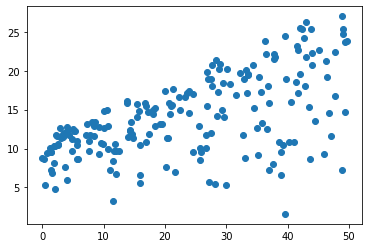

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(X, y, marker = 'o')
plt.show()

In [ ]:
def predict(new_radio, weight, bias): #hàm dự đoán
  return weight * new_radio + bias

def cost_function(X, y, weight, bias): #hàm chi phí
  n = len(X) #số lượng data
  sum_error = 0
  for i in range(n):
    sum_error += (y[i] - (weight * X[i] + bias)) ** 2
  return sum_error / n

def update_weight(X, y, weight, bias, learning_rate):
  n = len(X)
  weight_temp = 0.0
  bias_temp = 0.0
  for i in range(n):
    weight_temp += -2 * X[i] * (y[i] - (X[i] * weight + bias))
    bias_temp += -2 * (y[i] - (X[i] * weight + bias))
  weight -= (weight_temp / n) * learning_rate
  bias -= (bias_temp / n) * learning_rate
  return weight, bias

def train(X, y, weight, bias, learning_rate, iter):
  cost_his = []
  for i in range(iter):
    weight, bias = update_weight(X, y, weight, bias, learning_rate)
    cost = cost_function(X, y, weight, bias)
    cost_his.append(cost)
  return weight, bias, cost_his

weight, bias, cost = train(X, y, 0.03, 0.0014, 0.001, 30)
print(predict(19, weight, bias))

9.334428029952727


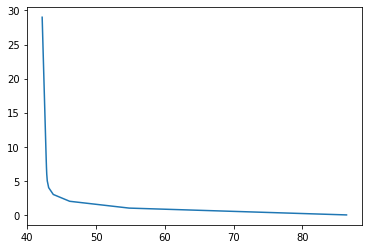

In [ ]:
solanlap = [i for i in range(30)]
plt.plot(cost, solanlap)
plt.show()